In [1]:
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.datasets import fetch_openml

df = fetch_openml(data_id=45106, parser="pandas").frame
df.head()

,year,town,driver_age,car_weight,car_power,car_age,claim_nb
0,2018.0,1.0,51.0,1760.0,173.0,3.0,0.0
1,2019.0,1.0,41.0,1760.0,248.0,2.0,0.0
2,2018.0,1.0,25.0,1240.0,111.0,2.0,0.0
3,2019.0,0.0,40.0,1010.0,83.0,9.0,0.0
4,2018.0,0.0,43.0,2180.0,169.0,5.0,0.0


In [2]:
# Train model on 80% of the data
y = df.pop("claim_nb")
n_train = 800_000
X_train, y_train = df.iloc[:n_train], y.iloc[:n_train]
X_test, y_test = df.iloc[n_train:], y.iloc[n_train:]

params = {
    "learning_rate": 0.05,
    "objective": "poisson",
    "num_leaves": 7,
    "min_child_samples": 50,
    "min_child_weight": 0.001,
    "colsample_bynode": 0.8,
    "subsample": 0.8,
    "reg_alpha": 3,
    "reg_lambda": 5,
    "verbose": -1,
}

model = LGBMRegressor(n_estimators=300, **params, random_state=1)
model.fit(X_train, y_train)

LGBMRegressor(colsample_bynode=0.8, learning_rate=0.05, min_child_samples=50,
              n_estimators=300, num_leaves=7, objective='poisson',
              random_state=1, reg_alpha=3, reg_lambda=5, subsample=0.8,
              verbose=-1)

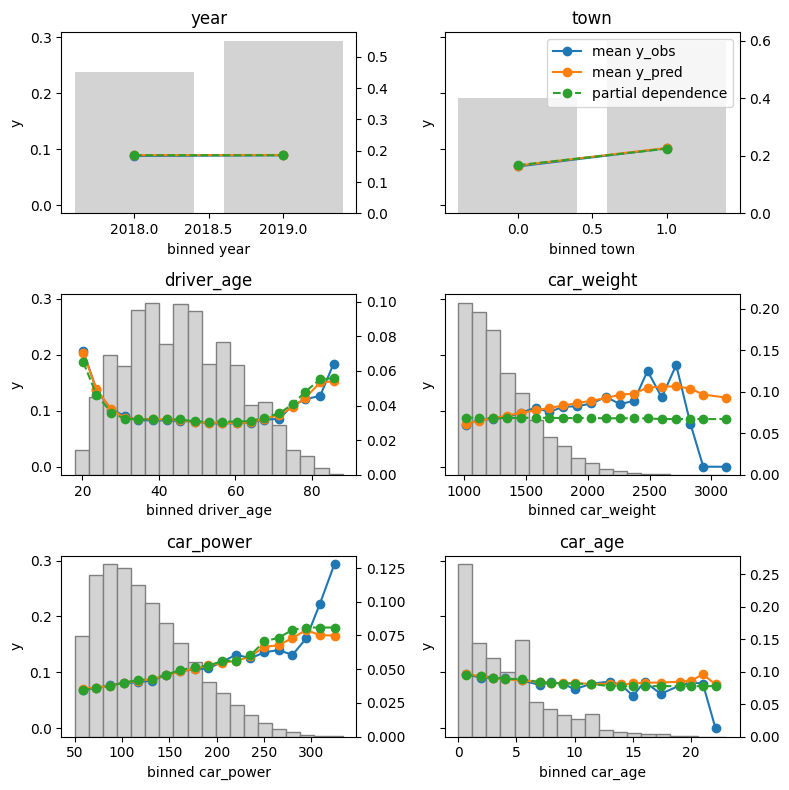

In [3]:
from model_diagnostics.calibration import plot_marginal

fig, axes = plt.subplots(3, 2, figsize=(8, 8), sharey=True, layout="tight")

for i, (feat, ax) in enumerate(zip(X_test.columns, axes.flatten())):
    plot_marginal(
        y_obs=y_test,
        y_pred=model.predict(X_test),
        X=X_test,
        feature_name=feat,
        predict_function=model.predict,
        ax=ax,
    )
    ax.set_title(feat)
    if i != 1:
        ax.legend().remove()